### Context of the dataset
#### According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attribute Information
#### 1) id: unique identifier
#### 2) gender: "Male", "Female" or "Other"
#### 3) age: age of the patient
#### 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
#### 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
#### 6) ever_married: "No" or "Yes"
#### 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
#### 8) Residence_type: "Rural" or "Urban"
#### 9) avg_glucose_level: average glucose level in blood
#### 10) bmi: body mass index
#### 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
#### 12) stroke: 1 if the patient had a stroke or 0 if not
#### Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
#Importing the necessary libraries for this project.
import pandas as pd
import numpy as np

#importing sklearn libraries
from sklearn import preprocessing
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from numpy import mean
from numpy import std
import math

#importing the library that will split the dataset.
from sklearn.model_selection import train_test_split

# importing data visualization libraries.
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Performing Exploratory Data Analysis

In [2]:
#importing the dataset for this project
df=pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
#checking the contents of the target variable
df['stroke'].unique()

array([1, 0], dtype=int64)

In [4]:
#Checking the counts of each values that the target variable has.
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

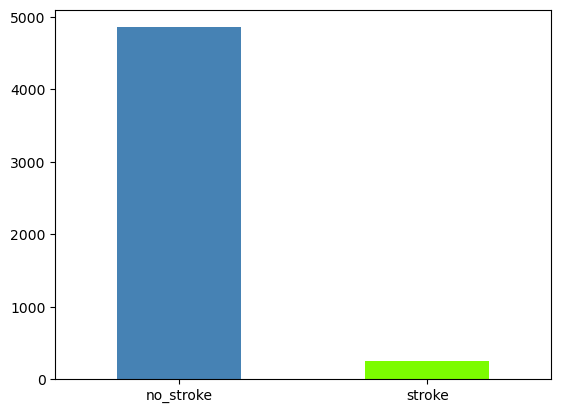

In [5]:
#visualizing the result of the value_counts function for the target variable.

st_plot = df["stroke"].value_counts().plot(kind="bar",color=["steelblue","lawngreen"], rot=0)
plt.xticks(ticks=[1,0], labels=["stroke", "no_stroke"]);

#it is evident that this dataset is imbalanced, since most samples have a value of 0 or no stroke.
#This may caused biased, so we will do something about this later on.

In [6]:
df.info()

#checking the info for our datafram.
#it seems that some columns have a dtype of object, which means these are string values and may not do well in training the 
#model later on. We will transform the object type columns into numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
#Upon realizing that the dataset contains an "id" feature which is somewhat useless in the training of the model,
#Thus, I have decided to remove this column.
df.drop(columns =["id"], axis = 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [9]:
#Now let's look check the dataset for null values, and treat the features which contains null values.
df.isnull().sum()

#Upon checking, it seems that bmi has null values, so we will treat it.

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
#I'll check first what values that bmi contains.

df["bmi"].unique()

#Upon checking the feature contains numerica values specifically floating numbers, so I have decided to treat the null values
#by getting the median of the column and fill the null values with the value of the median.

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [11]:
# I'll check first the median of the column bmi
df["bmi"].median()

28.1

In [12]:
#I'll now fill the null values of the column bmi with its median value.
df["bmi"].fillna(df["bmi"].median(),inplace=True)

In [13]:
#recheck the df for null values

df.isnull().sum()

#It seems that null values are not present now in the dataset!

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
#I'll now transform the object type features into numeric values.

#I'll first check the values of the each features.

df["ever_married"].value_counts() 

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [16]:
 df["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [17]:
df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [18]:
df["Residence_type"].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [19]:
#Upon checking the values of each the features which object type, it seems that all of them are categorical.
#So, I'll proceed on encoding the labels into numerical values.

#I'll now transform the object types into numerical ones, using the code below

le = preprocessing.LabelEncoder()

for col in list(df.columns):
    if df[col].dtype == object:
        print("Column Name: \t\t", col)
        print("Unique Values: \t\t", list(df[col].unique()) )
        print("Length: \t\t", len(df[col].unique()))
        
        # Setting the variable choice into 1 to make all categorical values into numericals.
        choice = 1
        
        # 1-> Yes
        # other value -> No
        if choice == 1:
            df[col]= le.fit_transform(df[col])
            print("Label Encoding Done Sucessfully ")
        else:
            print("Label Encoding Unsucessful")

Column Name: 		 gender
Unique Values: 		 ['Male', 'Female', 'Other']
Length: 		 3
Label Encoding Done Sucessfully 
Column Name: 		 ever_married
Unique Values: 		 ['Yes', 'No']
Length: 		 2
Label Encoding Done Sucessfully 
Column Name: 		 work_type
Unique Values: 		 ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Length: 		 5
Label Encoding Done Sucessfully 
Column Name: 		 Residence_type
Unique Values: 		 ['Urban', 'Rural']
Length: 		 2
Label Encoding Done Sucessfully 
Column Name: 		 smoking_status
Unique Values: 		 ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
Length: 		 4
Label Encoding Done Sucessfully 


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


In [21]:
#I'll check the values of the gender, and see its contents.

df["gender"].value_counts()

#Upon checking there is a one sample of 2 which is the other value. 
#I decided to drop this, since it's only 1 sample.

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [29]:
# Finding out which row is containes the 2 which is the Other
df[df["gender"] == 2]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,2,26.0,0,0,0,2,0,143.33,22.4,1,0


In [30]:
# Dropping the Other value
df.drop(3116 ,inplace=True)

In [32]:
df[df["gender"] == 2]

#Upon checking the row which contains the 2 has been dropped succesfully.

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


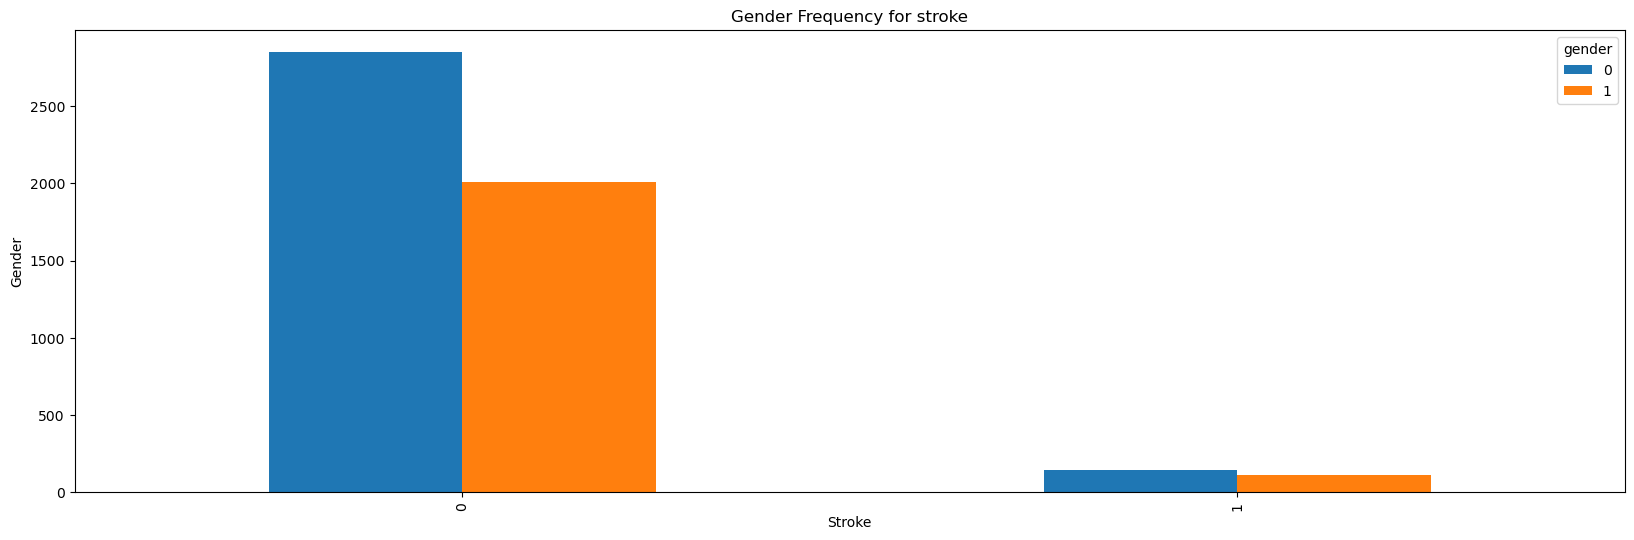

In [33]:
pd.crosstab(df['stroke'],df.gender).plot(kind="bar",figsize=(20,6))
plt.title('Gender Frequency for stroke')
plt.xlabel('Stroke')
plt.ylabel('Gender')
plt.show()

# I'll check the gender frequency for the target variable.


In [34]:
#It seems that there are more female who had not stroke, as oppose to males. This will not conclude that females will have 
#higher chances of not having a stroke or otherwise. 

Text(0.5, 0, 'Age')

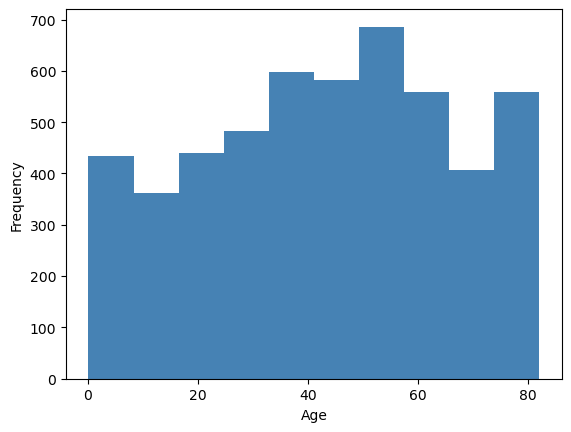

In [35]:
# Check the distribution of data by ages.
df["age"].plot.hist(color="steelblue")
plt.xlabel("Age")

In [36]:
#It seems that there are more older ages in our samples.

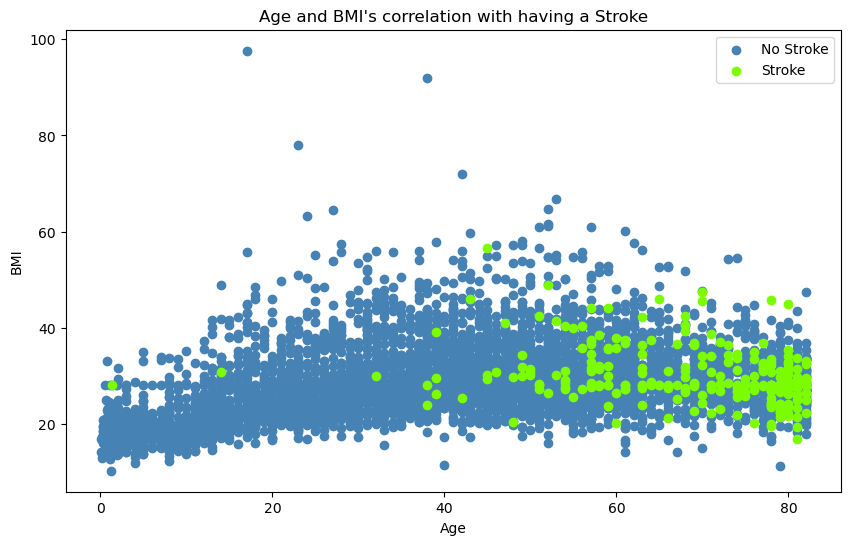

In [37]:
# I'll now proceed with the correlation of having a stroke with Age and BMI features, and see some insights from it,
plt.figure(figsize=(10,6))

# Ages and BMI for people who haven't had a stroke
plt.scatter(df.age[df.stroke==0], 
            df.bmi[df.stroke==0],
            c="steelblue")

# Ages and BMI for people who have had a stroke
plt.scatter(df.age[df.stroke==1], 
            df.bmi[df.stroke==1],
            c="lawngreen")

# Styling
plt.title("Age and BMI's correlation with having a Stroke")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(["No Stroke", "Stroke"]);

In [38]:
#Upon checking the results, I can now predict that the machine learning model will lean towards to older ages as having a
#chance of having stroke.

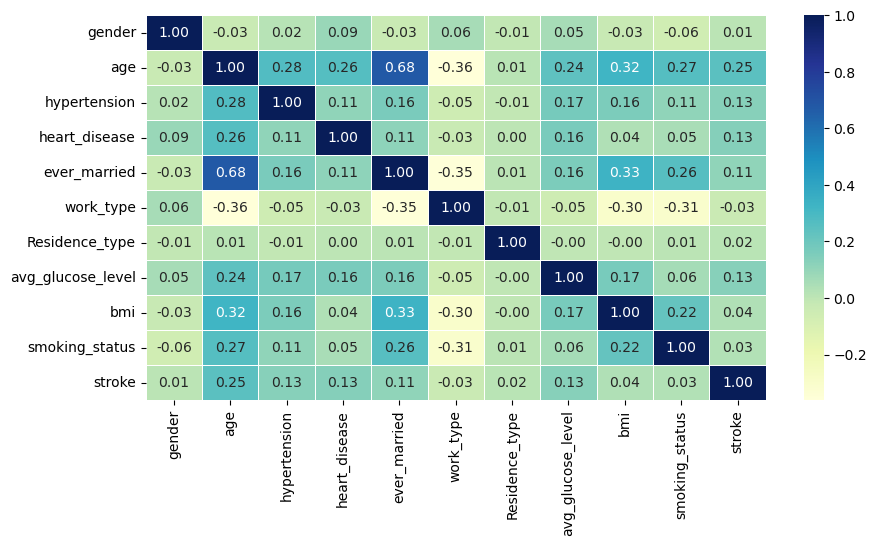

In [39]:
#I'll check the correlation of the features using pearson.
corr_matrix = df.corr() 
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix,
            annot=True, 
            linewidths=0.5,
            fmt=".2f", 
            cmap="YlGnBu" 
        );

In [44]:
#Upon checking the correlation, it seems that age is much more correlated to the target variable than other features.
#Thus, It can imply that age is a big indicator despite not having a high positive correlation.

In [49]:
# Splitting the target variable and features.
X = df.drop("stroke", axis = 1)
y = df["stroke"]

# Spilit the train and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Dealing with the imbalanced dataset, using the SMOTE

In [67]:
#Since we had an imbalanced dataset, I have decided to use SMOTE (Synthetic Minority Oversampling Technique)

# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape: ', y.value_counts())
print('Resample dataset shape: ', y_smote.value_counts())

Original dataset shape:  0    4860
1     249
Name: stroke, dtype: int64
Resample dataset shape:  1    4860
0    4860
Name: stroke, dtype: int64


In [76]:
#So, the results now, will increase the number of samples for our dataset.

In [77]:
# Reinitialize the split and train dataset, to use the dataset which was generated by the SMOTE.
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42)

# Model Training Phase

In [78]:
# Setting the models to be used and store it in a dictionary.
models = {"Linear SVC": LinearSVC(),
          "KNeighbors": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression()
         }

In [79]:
#check model performance using 5-fold cross validation
for name, model in models.items():
    cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
    scores = cross_val_score(model, X_train, y_train, cv = cv, n_jobs = 1, error_score = 'raise')
    print(name, '\n5-Fold Validation Scores:\n', scores)
    print('Cross Validation Training Accuracy: %.3f (%.3f)\n' % (mean(scores), std(scores)))

C:\Users\drene\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\drene\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\drene\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\drene\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\drene\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVC 
5-Fold Validation Scores:
 [0.75192802 0.5903537  0.79807074 0.79935691 0.68038585]
Cross Validation Training Accuracy: 0.724 (0.080)

KNeighbors 
5-Fold Validation Scores:
 [0.87660668 0.88167203 0.89389068 0.88553055 0.86559486]
Cross Validation Training Accuracy: 0.881 (0.009)

Random Forest 
5-Fold Validation Scores:
 [0.93637532 0.93569132 0.94855305 0.93440514 0.92797428]
Cross Validation Training Accuracy: 0.937 (0.007)



C:\Users\drene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\drene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression 
5-Fold Validation Scores:
 [0.80141388 0.79421222 0.80128617 0.80836013 0.79292605]
Cross Validation Training Accuracy: 0.800 (0.006)



C:\Users\drene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
# I'll now use the evaluation metrics for this project and see the results.

results = dict()
for name, model in models.items():
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    print('\nAlgorithm: ', name)
    res_cm = confusion_matrix(y_test, predicted)
    print('Confusion Matrix:\n', res_cm)
    res_acc = accuracy_score(y_test, predicted)
    print('Accuracy: ', res_acc)
    res_pres = precision_score(y_test, predicted, average='micro')
    print('Precision: ', res_pres)
    res_recall = recall_score(y_test, predicted, average='micro')
    print('Recall Score: ', res_recall)
    res_f1 = f1_score(y_test, predicted, average='micro')
    print('F1 Score: ', res_f1)
    
    results[name]=res_acc
    

C:\Users\drene\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Algorithm:  Linear SVC
Confusion Matrix:
 [[639 337]
 [ 65 903]]
Accuracy:  0.7932098765432098
Precision:  0.7932098765432098
Recall Score:  0.7932098765432098
F1 Score:  0.7932098765432098

Algorithm:  KNeighbors
Confusion Matrix:
 [[781 195]
 [ 15 953]]
Accuracy:  0.8919753086419753
Precision:  0.8919753086419753
Recall Score:  0.8919753086419753
F1 Score:  0.8919753086419753

Algorithm:  Random Forest
Confusion Matrix:
 [[897  79]
 [ 29 939]]
Accuracy:  0.9444444444444444
Precision:  0.9444444444444444
Recall Score:  0.9444444444444444
F1 Score:  0.9444444444444444

Algorithm:  Logistic Regression
Confusion Matrix:
 [[762 214]
 [170 798]]
Accuracy:  0.8024691358024691
Precision:  0.8024691358024691
Recall Score:  0.8024691358024691
F1 Score:  0.8024691358024691


C:\Users\drene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Upon training the models, I found out that Random Forest algorithm performs well having 94% with all evaluation metrics. Since we have dealed with the imbalanced dataset, it is now more convincing that the predictions being made by the model is more accurate, than having an imbalanced dataset.

In [81]:
#checking the result of the models based on the evaluation metrics used
print(results)

{'Linear SVC': 0.7932098765432098, 'KNeighbors': 0.8919753086419753, 'Random Forest': 0.9444444444444444, 'Logistic Regression': 0.8024691358024691}


#### With this, I will now end the data modelling and proceed on deploying the random forest algorithm since it got the highest evaluation metrics, and test it for batch predictions

In [84]:
#importing pickle library
import pickle
pickle.dump(models['Random Forest'], open('stroke_pred_mf.pkl', 'wb'))

In [83]:
#Batch Predictions

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [85]:
#loading the deployed model to be used in the batch predictions.
test_model = pickle.load(open('stroke_pred_mf.pkl', 'rb'))

In [88]:
new_Xdata = X_test.sample(10)
new_Ydata = y_test.loc[new_Xdata.index.values]
print(new_Xdata)

#Generating 10 samples for this test.

      gender        age  hypertension  heart_disease  ever_married  work_type  \
3720       0   7.000000             0              0             0          4   
5173       0  76.510822             0              0             1          2   
6547       0  70.314860             0              0             1          2   
4843       0   4.000000             0              0             0          4   
487        1  21.000000             0              0             1          2   
4080       1  40.000000             0              0             1          2   
4817       0  44.000000             0              0             1          2   
394        0  20.000000             0              0             0          2   
3964       0  54.000000             1              0             1          2   
5614       0  12.608784             0              0             0          3   

      Residence_type  avg_glucose_level        bmi  smoking_status  
3720               1         113.950000

In [89]:
# Actual data
print(new_Ydata)

3720    0
5173    1
6547    1
4843    0
487     0
4080    0
4817    0
394     0
3964    0
5614    1
Name: stroke, dtype: int64


In [90]:
#predictions by the deployed model
pred = test_model.predict(new_Xdata)
print(pred)

[0 1 1 0 0 0 0 0 0 0]


Confusion Matrix:
 [[7 0]
 [1 2]]
Accuracy Score:
 0.9


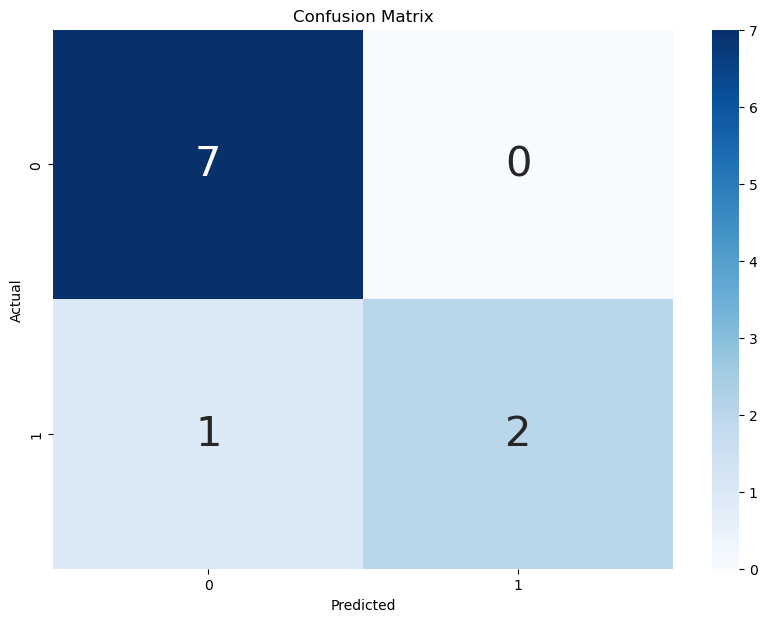

In [91]:
#checking for the peformance of the model when predicting using confusion matrix
res_cm = confusion_matrix (new_Ydata, pred)
print('Confusion Matrix:\n', res_cm)
res_acc = accuracy_score(new_Ydata, pred)
print('Accuracy Score:\n', res_acc)

plt.figure(figsize = (10,7))
cm_heatmap = sns.heatmap(res_cm, annot=True, annot_kws={"size": 30},cmap='Blues')
cm_heatmap.set(title='Confusion Matrix')
cm_heatmap.set(xlabel='Predicted', ylabel='Actual')
plt.show()



In [92]:
# It is evident that the deployed model, performs well when predicting 10 samples, it got 90% of perforamce score.
#Thus, the deployed model will now be used in the front-end integration of this project.